# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Laila Nurul Fauziyyah
- **Email:** laianurul692@gmail.com
- **ID Dicoding:** b25b9d038

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue dari Platform?
- Produk apa yang paling banyak dan paling sedikit diminati pelanggan?
- Kapan seller terakhir memiliki pesanan yang sukses di kirimkan?
- Seberapa sering seller menerima pesanan dan menyelesaikan transaksi?
- Berapa total pendapatan seller untuk platform sebelum komisi?

## Import Semua Packages/Library yang Digunakan

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [68]:
drive.mount('/content/drive')

customers_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/customers_dataset.csv')
geo_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/geolocation_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/orders_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/order_items_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/order_reviews_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/sellers_dataset.csv')
product_category_name_translation_df = pd.read_csv('/content/drive/MyDrive/Dicoding BoothCamp/Belajar Analisis Data dengan Python/e-commerce/product_category_name_translation.csv')

print("Customers Dataset:")
display(customers_df.head())
print("Geolocation Dataset:")
display(geo_df.head())
print("\nOrders Dataset:")
display(orders_df.head())
print("\nOrder Items Dataset:")
display(order_items_df.head())
print("\nOrder Payments Dataset:")
display(order_payments_df.head())
print("\nOrder Reviews Dataset:")
display(order_reviews_df.head())
print("\nProducts Dataset:")
display(products_df.head())
print("\nSellers Dataset:")
display(sellers_df.head())
print("\nProduct Category Name Translation Dataset:")
display(product_category_name_translation_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Customers Dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Geolocation Dataset:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Order Payments Dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Order Reviews Dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Sellers Dataset:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Product Category Name Translation Dataset:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

Customer Dataset
- customer_iD = ID unik untuk setiap pesanan
- customer_unique_id = ID unik untuk setiap pelanggan
- customer_zip_code_prefix= Kode pos pelanggan
- customer_city = Kota tempat pelanggan berada
- customer_state = Negara pelanggan

Geolocation Dataset
- geolocation_zip_code_prefix	= kode pos
- geolocation_lat	= garis lintang dari lokasi kode pos
- geolocation_lng	= garis bujur dari lokasi kode pos
- geolocation_city	= kota kode pos
- geolocation_state = negara kode pos

Order Dataset
- order_id = id unik pesanan/order
- customer_id	= id pelanggan
- order_status	=  status pesanan
- order_purchase_timestamp	= waktu pembelian
- order_approved_at	= waktu pembayaran disetujui
- order_delivered_carrier_date	= waktu pesanan disearhkan ke kurir
- order_delivered_customer_date = waktu pesanan sampai ke pelanggan
- order_estimated_delivery_date = perkiraan wakatu pengiriman

Order Items Dataset
- order_id = id pesanan/order
- order_item_id = nomor urut item dalam pesaanan
- product_id = id produk
- seller_id = id penjual
- shipping_limit_date = tanggal batas waktu pengiriman yang di tentukan Olist
- price = harga
- freight_value = harga ongkos kirim

Order Payment Dataset
- order_id = id pesanan/order
- payment_sequential = urutan pembayaran
- payment_type = metode pembayaran
- payment_installments = jumlah cicilan jika menggunakan kartu kredit
- payment_value = jumlah yang dibayarkan

Order Review Dataset
- review_id = id review
- order_id = id pesanan/pembelian
- review_score = skor ulasan
- review_comment_tittle = judul ulasan
- review_comment_message = pesan/konten ulasan
- review_creation_date = tanggal ulasan dibuat
- review_answer_timestamp = tanggal ulasan di tanggapi

Product Dataset
- product_id = id produk
- product_category_name = kategori produk dalam bahasa portugis
- product_name_length = panjang karakter nama produk
- product_description_length = panjang karakter deskripsi produk
- product_photos_qty = jumlah photo produk
- product_weight_g = berat produk dalam gram
- product_length_cm = panjang produk dalam cm
- product_height_cm = tinggi produk dalam cm
- product_width_cm = lebar produk dalam cm

Seller Dataset
- seller_id = id penjual
- seler_zip_code_prefix = kode pos penjual
- seller_city = kota penjual
- seller_state = negara penjual

Product Category Name Translation Dataset
- product_category_name = kategori produk dalam bahasa protugis
- product_category_name_english = kategori produk dalam bahasa inggris


Dataset e-commerce Olist memberikan pandangan tentang kinerja bisnis marketplace mulai dari operasional hingga kepuasan pelanggan. Kinerja Olist bergantung pada keberhasilan para Penjual Kecil yang terdaftar. Olist juga menyediakan layanan logistik terpusat.

Yang perlu di perhatikan :
- satu pesanan mungkin memiliki banyak item
- setiap item mungkin dipenuhi oleh penjual yang berbeda
- nama toko/mitra di ganti dengan nama nama karakter di Game of Thrones

### Assessing Data

In [69]:
# menilai tabel customers_df
customers_df.info()
display(customers_df.isna().sum())
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Jumlah duplikasi:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [70]:
# menilai tabel geo_df
geo_df.info()
display(geo_df.isna().sum())
print("Jumlah duplikasi: ",geo_df.duplicated().sum())
geo_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [71]:
# menilai tabel order_df

orders_df.info()
display(orders_df.isna().sum())
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [72]:
# menilai tabel order_items_df

order_items_df.info()
display(order_items_df.isna().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Jumlah duplikasi:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [73]:
# menilai tabel order_payments_df

order_payments_df.info()
display(order_payments_df.isna().sum())
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Jumlah duplikasi:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [74]:
# menilai tabel order_reviews_df

order_reviews_df.info()
display(order_reviews_df.isna().sum())
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Jumlah duplikasi:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [75]:
# menilai tabel product_df

products_df.info()
display(products_df.isna().sum())
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Jumlah duplikasi:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [76]:
# menilai tabel sellers_df

sellers_df.info()
display(sellers_df.isna().sum())
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Jumlah duplikasi:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [77]:
# menilai tabel product_category_name_translation_df

product_category_name_translation_df.info()
display(product_category_name_translation_df.isna().sum())
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


 **Insight:**

- customers_df = tidak ada masalah untuk tipe data, missing value, data duplikat dan inaccurate value nya.
- geo_df = tidak ada masalah untuk tipe data, missing value, dan inaccurate valuenya, namun terdapat duplikat sebanyak 261831 yang perlu di tindak lanjuti.
- orders_df = terdapat tipe data yang perlu di ubah pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date dari object menjadi datetime. terdapat missing value pada order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783, order_delivered_customer_date sebanyak 2965 yang perlu di perhatikan dan ditindak lanjuti. tidak ada data duplikat, tidak ada masalah pada accurate value.  
- order_items_df = mengubah type data shipping_date_time menjadi datetime. terdapat freight_value yang memiliki value 0 sehingga perlu di investigasi. Lalu terdapat value price seharga 0.85 yang menaruh harga kecil sehingga perlu di investigasi.
- order_payments_df = terdapat tipe data yang perlu diubah pada kolom payment_sequential dan payment_installment diubah menjadi integer. tidak ada masalah missing value dan duplikasi data. namun pada inaccurate value perlu di investigasi pada masalah paymen_value yang memberikan hasil 0 reais, apakah karna diskon atau menggunakan vocher 100% dll, serta menginvestigasi pembelian dengan total harga 13684 reais, apakah ada terindikasi fraud.   
- order_reviews_df = terdapat tipe data yang perlu diubah yaitu pada kolom review_creation_date, dan review_answer_timestamp dari object menjadi timestamp. terdapat missing value pada kolom review_comment_title dan review_comment_message yang perlu di tindak lanjuti. tidak ada masalah duplikasi data. dan tidak ada masalah pada kekonsistenan data.
- product_df = terdapat tipe data yang perlu diubah yaitu pada kolom product_name_length, product_description_length, dan product_photos_qty yang perlu diubah menjadi integer. terdapat banyak missing value yang perlu di tindak lanjuti. tidak ada masalah duplikasi. dan terdapat inaccurate data yang menunjukkan berat barang sebanyak 0 gram yang perlu di investoigasi serta terdapat barang dengan berat 40425 gram harus di investigasikan.  
- sellers_df = tidak ada masalah untuk tipe data, missing value, data duplikat dan inaccurate value nya.
- product_category_name_transalation_df = tidak ada masalah untuk tipe data, missing value, data duplikat dan inaccurate value nya.

### Cleaning Data

In [78]:
# ==========================================
# MEMBERSIHKAN DATA geo_df
# ==========================================


# menangani duplicate data
geo_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi setelah dihapus:", geo_df.duplicated().sum())

Jumlah duplikasi setelah dihapus: 0


In [79]:
# ==========================================
# MEMBERSIHKAN DATA orders_df
# ==========================================

# menangani type data
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# melihat type data yang sudah di ubah
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [80]:
# menangani missing value // dengan melakukan imputation

# menghitung waktu tunda rata-rata
def calculate_median_lag(start_col, end_col):
  lag_seconds = (orders_df[end_col] - orders_df[start_col]).dt.total_seconds().median()
  return pd.Timedelta(seconds=lag_seconds if not pd.isna(lag_seconds) else 0)

# Hitung semua median lag yang dibutuhkan
approval_lag = calculate_median_lag('order_purchase_timestamp', 'order_approved_at')
carrier_lag = calculate_median_lag('order_approved_at', 'order_delivered_carrier_date')
customer_delivery_lag = calculate_median_lag('order_delivered_carrier_date', 'order_delivered_customer_date')

# 1. Imputasi order_approved_at
# Mengganti NaN dengan waktu pembelian + median waktu tunda persetujuan
orders_df['order_approved_at'].fillna(
    orders_df['order_purchase_timestamp'] + approval_lag,
    inplace=True
)
# 2. Imputasi order_delivered_carrier_date
# Mengganti NaN dengan waktu persetujuan (yang sudah diimputasi) + median waktu tunda ke kurir
orders_df['order_delivered_carrier_date'].fillna(
    orders_df['order_approved_at'] + carrier_lag,
    inplace=True
)
print("✅ order_delivered_carrier_date berhasil diimputasi (kolom asli diganti).")


# 3. Imputasi order_delivered_customer_date
# Prioritas 1: Gunakan Estimated Delivery Date
orders_df['order_delivered_customer_date'].fillna(
    orders_df['order_estimated_delivery_date'],
    inplace=True
)


print(orders_df.isna().sum())


✅ order_delivered_carrier_date berhasil diimputasi (kolom asli diganti).
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


/tmp/ipython-input-2085413974.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(
/tmp/ipython-input-2085413974.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Tahapan imputasi diatas bertujuan untuk mengatasi missing values pada kolom-kolom tanggal dan waktu yang krusial dalam rantai logistik pesanan, yaitu: order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

Metode yang digunakan adalah Imputasi Berbasis Logika Bisnis (Median Time Lag), di mana nilai yang hilang diestimasi berdasarkan rata-rata waktu tunda (lag) antara tahapan proses yang berurutan. Semua imputasi dilakukan dengan menimpa kolom asli.

1. Perhitungan Waktu Tunda Rata-rata (Median Lag)
Sebelum imputasi, dihitung terlebih dahulu waktu tunda rata-rata (menggunakan median untuk ketahanan terhadap outlier waktu pemrosesan yang sangat lama) antara setiap tahapan logistik yang valid. Hasil perhitungan tahapan waktu :
*   Persetujuan = approved - purchase
*   ke Kurir = carrier - approved
*   ke Pelanggan = customer - carrier

2. Imputasi Berurutan (Sequential Imputation)
Imputasi dilakukan secara berurutan, memastikan bahwa setiap kolom diisi dengan nilai yang logis (tidak mungkin tanggal serah terima kurir terjadi sebelum tanggal persetujuan).

2.1. Imputasi order_approved_at
Logika: Tanggal persetujuan diestimasi dengan menambahkan Median Tunda Persetujuan (approval_lag) ke tanggal pembelian (order_purchase_timestamp).

2.2. Imputasi order_delivered_carrier_date
Logika: Tanggal serah terima kurir diestimasi dengan menambahkan Median Tunda ke Kurir (carrier_lag) ke tanggal persetujuan (order_approved_at) yang sudah diimputasi pada langkah 2.1.

2.3. Imputasi order_delivered_customer_date
Prioritas 1 (Terbaik): Nilai NaN diisi terlebih dahulu menggunakan Tanggal Estimasi Pengiriman (order_estimated_delivery_date). Ini adalah estimasi paling valid yang diberikan oleh sistem.

3. Mengisi nilai yang masih kosong yang kemudian dilanjutkan dengan verififkasi.

In [81]:
# ==========================================
# MEMBERSIHKAN DATA order_items_df
# ==========================================

# menangani tipe data
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# verifikasi
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [82]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [83]:
# ==========================================
# MEMBERSIHKAN DATA order_payment_df
# ==========================================

# menangani tipe data
order_payments_df['payment_sequential'] = order_payments_df['payment_sequential'].astype('int')

# verifikasi
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [84]:
# memeriksa outlier zero
order_payments_df[order_payments_df.payment_value == order_payments_df.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [85]:
# 1. Menampilkan Semua Kolom (Tidak ada kolom yang disembunyikan dengan '...')
pd.set_option('display.max_columns', None)

# 2. Menampilkan Semua Baris (Tidak ada baris yang disembunyikan dengan '...')
pd.set_option('display.max_rows', None)

# Mengatur lebar tampilan menjadi sangat besar (misalnya 500 karakter)
pd.set_option('display.width', 500)



# --- 1. Filter Transaksi Pembayaran Nol ---
payments_zero = order_payments_df[order_payments_df['payment_value'] == 0]

# --- 2. Gabungkan dengan Orders DataFrame ---
# Menggunakan order_id untuk mendapatkan status pesanan dari orders_df
merged_zero_payments_df = pd.merge(
    payments_zero,
    orders_df[['order_id', 'order_status']],
    on='order_id',
    how='left'  # Pertahankan semua baris payments_zero
)

# --- 3. Tampilkan Barisan Data Hasil Analisis ---
print("Barisan Data dengan payment_value = 0 dan Status Pesanan Terkait:")
# Tampilkan kolom-kolom kunci untuk pemeriksaan
print(merged_zero_payments_df[['order_id', 'payment_sequential', 'payment_type', 'payment_value', 'order_status']])

Barisan Data dengan payment_value = 0 dan Status Pesanan Terkait:
                           order_id  payment_sequential payment_type  payment_value order_status
0  8bcbe01d44d147f901cd3192671144db                   4      voucher            0.0    delivered
1  fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher            0.0      shipped
2  6ccb433e00daae1283ccc956189c82ae                   4      voucher            0.0    delivered
3  4637ca194b6387e2d538dc89b124b0ee                   1  not_defined            0.0     canceled
4  00b1cb0320190ca0daa2c88b35206009                   1  not_defined            0.0     canceled
5  45ed6e85398a87c253db47c2d9f48216                   3      voucher            0.0    delivered
6  fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher            0.0      shipped
7  c8c528189310eaa44a745b8d9d26908b                   1  not_defined            0.0     canceled
8  b23878b3e8eb4d25a158f57d96331b18                   4      

setelah dilakukan analisis lebih lanjut, ternyata payment value yang bernilai 0 menggunakan banyak vocher hingga 100%. dan terdapat 3 pesanan yang di cancel dan seharusnya itu di hapus karena pembayaran tidak pernah terjadi.

In [86]:
# menghitung baris yang status pembeliannya adalah not_defined
not_defined_count = (order_payments_df['payment_type'] == 'not_defined').sum()
print(f"Jumlah transaksi dengan payment_type 'not_defined'= {not_defined_count}")

Jumlah transaksi dengan payment_type 'not_defined'= 3


In [87]:
# karena hanya 3 baris yang status pembayarannya di cancel, dan itu sesuai dengan baris yang tidak memiliki metode pembayaran, maka baris dapat di hapus
# Hapus baris dengan mempertahankan baris di mana payment_type TIDAK SAMA DENGAN 'not_defined'
order_payments_df = order_payments_df[
    order_payments_df['payment_type'] != 'not_defined'
]

print("✅ Baris dengan payment_type = 'not_defined' berhasil dihapus.")
print(f"Total baris order_payments_df sekarang: {order_payments_df.shape[0]}")

✅ Baris dengan payment_type = 'not_defined' berhasil dihapus.
Total baris order_payments_df sekarang: 103883


In [88]:
# memeriksa outlier max
order_payments_df[order_payments_df.payment_value == order_payments_df.payment_value.max()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


In [89]:
pd.set_option('display.width', 700)

# --- 1. Filter Transaksi Spesifik ---
target_payment = 13664.08
target_df = order_payments_df[
    order_payments_df['payment_value'] == target_payment
]

if target_df.empty:
    print(f"⚠️ Tidak ditemukan transaksi dengan payment_value sebesar {target_payment}.")
else:
    target_order_id = target_df['order_id'].iloc[0]
    print(f"✅ Order ID yang diidentifikasi: {target_order_id}")
    print("-" * 50)

    # --- 2. Gabungkan Data (Merge) ---

    # A. Gabungkan dengan Orders (untuk status dan TANGGAL)
    analysis_df = pd.merge(
        target_df[['order_id', 'payment_value']],
        orders_df[['order_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date']], # Kolom tanggal ditambahkan di sini
        on='order_id',
        how='left'
    )

    # B. Gabungkan dengan Order Items (untuk harga, ongkir, dan seller ID)
    analysis_df = pd.merge(
        analysis_df,
        order_items_df[['order_id', 'product_id', 'order_item_id', 'price', 'freight_value', 'seller_id']],
        on='order_id',
        how='left'
    )

    # --- 3. Perhitungan dan Penyajian Hasil ---

    # Hitung total yang diharapkan (Price + Freight) untuk validasi
    validation_result = analysis_df.groupby('order_id').agg(
        order_status=('order_status', 'first'),
        payment_recorded=('payment_value', 'first'),
        order_purchase_timestamp=('order_purchase_timestamp', 'first'),        # Tanggal Pemesanan
        order_delivered_customer_date=('order_delivered_customer_date', 'first'), # Tanggal Sampai
        total_items=('order_item_id', 'count'),
        total_price_expected=('price', 'sum'),
        total_freight_expected=('freight_value', 'sum'),
        seller_id=('seller_id', lambda x: ', '.join(x.astype(str).unique()))
    ).reset_index()

    validation_result['calculated_total'] = validation_result['total_price_expected'] + validation_result['total_freight_expected']
    validation_result['difference'] = validation_result['payment_recorded'] - validation_result['calculated_total']

    # --- Tampilkan Baris Detail Item (untuk melihat harga individu) ---
    print("DETAIL ITEM DALAM PESANAN:")
    detail_columns = [
        'order_id', 'order_status', 'payment_value', 'order_item_id',
        'price', 'freight_value', 'product_id', 'seller_id',
        'order_purchase_timestamp', 'order_delivered_customer_date' # Kolom tanggal ditambahkan
    ]
    print(analysis_df[detail_columns])
    print("-" * 50)

    # --- Tampilkan Hasil Validasi Agregat (Total) ---
    print("VALIDASI TOTAL PESANAN:")
    total_columns = [
        'order_id',
        'order_purchase_timestamp',      # Ditampilkan di sini
        'order_delivered_customer_date', # Ditampilkan di sini
        'order_status',
        'seller_id',
        'total_items',
        'total_price_expected',
        'total_freight_expected',
        'calculated_total',
        'payment_recorded',
        'difference'
    ]
    print(validation_result[total_columns])

✅ Order ID yang diidentifikasi: 03caa2c082116e1d31e67e9ae3700499
--------------------------------------------------
DETAIL ITEM DALAM PESANAN:
                           order_id order_status  payment_value  order_item_id   price  freight_value                        product_id                         seller_id order_purchase_timestamp order_delivered_customer_date
0  03caa2c082116e1d31e67e9ae3700499    delivered       13664.08              1  1680.0          28.01  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2      2017-09-29 15:24:52           2017-10-17 18:22:29
1  03caa2c082116e1d31e67e9ae3700499    delivered       13664.08              2  1680.0          28.01  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2      2017-09-29 15:24:52           2017-10-17 18:22:29
2  03caa2c082116e1d31e67e9ae3700499    delivered       13664.08              3  1680.0          28.01  5769ef0a239114ac3a854af00df129e4  b37c4c02bda3161a7546a4e6d222d5b2      2017-09

Untuk memastikan tidak ada indikasi fraud, maka di periksa penjualan dengan order id yang sesuai dengan payment value nya. setelah di telaah ternyata tidak ada perbedaan yang mengindikasin fraud karena seller membeli 8 item pada tanggal yang sama, dan pembayaran dilakukan secara penuh dan barang telah sampai kepada pelanggan.

In [90]:
# ==========================================
# MEMBERSIHKAN DATA order_reviews_df
# ==========================================

# menangani type data
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# verifikasi
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


terdapat missing value pada kolom judul dan pesan dari pelanggan. namun hal tersebut tidak menjadi masalah karena pelanggan telah memberikan rating. maka judul dan pesan tersebut di lakukan imputasi dengan mengisi judul yang berisi Nan dengan "NO_TITLE_PROVIDED" dan pesan yang Nan menjadi "NO_MESSAGE_PROVIDED".

In [91]:
# menangani missing value
order_reviews_df.review_comment_title.fillna(value="NO_TITLE_PROVIDED", inplace=True)
order_reviews_df.review_comment_message.fillna(value="NO_MESSAGE_PROVIDED", inplace=True)

# verifikasi Nan
order_reviews_df.isna().sum()

/tmp/ipython-input-3379825642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_title.fillna(value="NO_TITLE_PROVIDED", inplace=True)
/tmp/ipython-input-3379825642.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Selanjutnya menangani missing value pada products_df. dikarenakan category_name tidak ada yang berhubungan dan memberikan hint, maka saya akan mengisi dengan "NO_CATEGORY_PROVIDED". Begitupun untuk kolomkolom berikutnya akan di isi dengan 0 dan kemudian mengganti type data menjadi integer.

In [92]:
# ==========================================
# MEMBERSIHKAN DATA product_df
# ==========================================

# menangani missing value dengan mengisi baris dengan value NO_CATEGORY_PROVIDED, dan value 0.
products_df.product_category_name.fillna(value="NO_CATEGORY_PROVIDED", inplace=True)
products_df.product_name_lenght.fillna(value=0, inplace=True)
products_df.product_description_lenght.fillna(value=0, inplace=True)
products_df.product_photos_qty.fillna(value=0, inplace=True)
products_df.product_weight_g.fillna(value=0, inplace=True)
products_df.product_length_cm.fillna(value=0, inplace=True)
products_df.product_height_cm.fillna(value=0, inplace=True)
products_df.product_width_cm.fillna(value=0, inplace=True)

# menangani type data
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype('int')
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype('int')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('int')
products_df['product_weight_g'] = products_df['product_weight_g'].astype('int')
products_df['product_length_cm'] = products_df['product_length_cm'].astype('int')
products_df['product_height_cm'] = products_df['product_height_cm'].astype('int')
products_df['product_width_cm'] = products_df['product_width_cm'].astype('int')


# verifikasi
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  int64 
 3   product_description_lenght  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


/tmp/ipython-input-3050912280.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value="NO_CATEGORY_PROVIDED", inplace=True)
/tmp/ipython-input-3050912280.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [93]:
# memeriksa value pada kategory cama_meso_banho
display(products_df[(products_df["product_category_name"] == "cama_mesa_banho")])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54,630,1,1100,16,10,16
19,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,52,206,1,500,16,10,16
21,518ef5de2c2b3a255e326a4594ba15d9,cama_mesa_banho,27,329,2,800,36,8,16
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,45,206,1,650,16,10,16
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,56,509,4,6350,45,15,35
82,a3c95dc653d9a279b160bc0179385ed1,cama_mesa_banho,39,1146,1,1750,30,18,30
86,32ee3f4e2493045726807808d7abbab6,cama_mesa_banho,54,381,2,1400,38,9,27
87,c2367eda4f9623d0355dc5d7796d857a,cama_mesa_banho,50,607,1,6450,100,10,11
99,3f0f8de616df6efb39a48f3c64eea974,cama_mesa_banho,49,701,1,1300,50,12,12
107,c33d78b97260227119fb2b71be168fca,cama_mesa_banho,39,170,1,650,27,10,22


cama_meso_banho berarti memang memiliki berat benda yang besar walaupun memiliki bentuk fisik yang kecil. Maka, baris dengan value freight_weight 40425 gram akan tetap di pertahankan.
Untuk produk yang memiliki berat sebanyak 0 gram dilakukan imputasi median untuk mengisi berat tersebut kecuali baris dengan value 0 pada keempat kolom fisiknya karena bisa jadi yang disediakan adalah jasa.

In [94]:
# melakukan imputasi median pada produk yang tidak memiliki berat namun masih memiliki ukuran fisik

category_name = 'cama_mesa_banho'
median_cama_mesa_banho = products_df[
    (products_df['product_category_name'] == category_name) &
    (products_df['product_weight_g'] > 0) &
    (products_df['product_weight_g'] < 40425)
]['product_weight_g'].median()

print(f"Median product_weight_g untuk '{category_name}': {median_cama_mesa_banho:.2f} gram")

impute_condition = (products_df['product_category_name'] == category_name) & \
                   (    (products_df['product_weight_g'] == 0) |
                        (products_df['product_weight_g'].isna())
                   )

products_df.loc[impute_condition, 'product_weight_g'] = median_cama_mesa_banho

# Verifikasi (mencetak baris yang sudah diimputasi)
print("\nVerifikasi Baris setelah Imputasi:")
display(products_df[impute_condition])

Median product_weight_g untuk 'cama_mesa_banho': 1250.00 gram

Verifikasi Baris setelah Imputasi:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51,529,1,1250,30,25,30
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48,528,1,1250,30,25,30
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53,528,1,1250,30,25,30
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53,528,1,1250,30,25,30


menghapus baris dengan value 0 pada barang yang tidak memiliki dimensi fisik dan tidak memiliki category_name

In [95]:
# Define the conditions for dropping rows
condition_to_drop = (products_df['product_category_name'] == 'NO_CATEGORY_PROVIDED') & \
                    (products_df['product_weight_g'] == 0) & \
                    (products_df['product_length_cm'] == 0) & \
                    (products_df['product_height_cm'] == 0) & \
                    (products_df['product_width_cm'] == 0)

# Drop rows that meet the condition
products_df = products_df[~condition_to_drop].copy()

# Verify the number of rows dropped
print(f"Number of rows dropped: {condition_to_drop.sum()}")
print(f"Number of rows remaining: {products_df.shape[0]}")

Number of rows dropped: 1
Number of rows remaining: 32950


**Insight from Data Cleaning:**

- **`geo_df`**: Entri duplikat berhasil dihapus, memastikan setiap awalan kode pos memiliki representasi geografis yang unik.
- **`orders_df`**: Tipe data untuk kolom timestamp dikonversi dengan benar menjadi objek datetime, yang penting untuk analisis berbasis waktu. Nilai yang hilang pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date ditangani menggunakan strategi imputasi jeda waktu median, memberikan perkiraan tanggal di mana data aktual hilang dan mempertahankan alur logis dari proses pesanan.
- **`order_items_df`**: Kolom shipping_limit_date dikonversi ke datetime. Investigasi awal terhadap nilai freight_value nol dan nilai price yang sangat rendah dicatat untuk analisis lebih lanjut, tetapi tidak ada tindakan pembersihan segera yang diambil berdasarkan penilaian saat ini.
- **`order_payments_df`**: Kolom payment_sequential dikonversi ke tipe integer. Transaksi dengan payment_type 'not_defined' dan nilai pembayaran 0 diselidiki dan dihapus karena kemungkinan besar mewakili pesanan yang dibatalkan atau entri yang tidak valid. Transaksi dengan payment_value maksimum juga diselidiki dan dianggap sah berdasarkan detail pesanan.
- **`order_reviews_df`**: Tipe data untuk kolom timestamp dikonversi ke datetime. Nilai yang hilang pada review_comment_title dan review_comment_message diimputasi dengan nilai placeholder ("NO_TITLE_PROVIDED", "NO_MESSAGE_PROVIDED") karena skor review ada, sehingga baris-baris ini dapat dipertahankan untuk analisis.
- **`products_df`**: Nilai yang hilang pada product_category_name diisi dengan "NO_CATEGORY_PROVIDED". Atribut produk numerik yang hilang (panjang, panjang deskripsi, jumlah foto, berat, dimensi) diisi dengan 0. Tipe data untuk kolom numerik ini dikonversi ke integer. Penanganan spesifik dilakukan untuk produk 'cama_mesa_banho' dengan berat nol tetapi memiliki dimensi fisik, dengan cara imputasi menggunakan berat median dari kategori tersebut. Satu baris spesifik dengan berat nol, tanpa dimensi, dan tanpa kategori dihapus karena tampaknya mewakili entri produk yang tidak valid.
- **`customers_df`, `product_category_name`, `sellers_df`**: Dataset ini ditemukan bersih tanpa nilai yang hilang, duplikat, atau poin data tidak akurat yang teridentifikasi selama penilaian awal.

Secara keseluruhan, proses pembersihan data secara signikan mengimprove kualitas dataset dengan menangani missing value, dupikat, type data, dan mengidentifikasi konsistensi data dan outlier.

## Exploratory Data Analysis (EDA)

### Explore Summary




In [96]:
display(sellers_df.describe(include="all"))
display(customers_df.describe(include="all"))
display(geo_df.describe(include="all"))
display(products_df.describe(include="all"))
display(product_category_name_translation_df.describe(include="all"))

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32950,32950,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
unique,32950,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.580971,757.236085,2.148528,2276.555144,30.814143,16.937147,23.196024
std,NaN,NaN,12.069288,637.741091,1.745718,4281.933589,16.915053,13.637666,12.079540
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Summary :
- **`sellers_df`** = Berisi 3095 penjual unik. Lokasi penjual tersebar di 611 kota dan 23 negara bagian. Mayoritas penjual berlokasi di Sao Paulo (SP). Awalan kode pos bervariasi luas, menunjukkan distribusi geografis penjual yang luas.
- **`customers_df`** = Mencakup 99.441 ID pelanggan unik, mewakili 96.096 pelanggan unik (beberapa pelanggan telah melakukan beberapa pesanan). Pelanggan berlokasi di 4.119 kota dan 27 negara bagian. Serupa dengan penjual, konsentrasi pelanggan terbesar berada di Sao Paulo (SP). Awalan kode pos mencakup jangkauan yang luas.
- **`geo_df`** = Berisi informasi geografis untuk sejumlah besar awalan kode pos (738.332 entri setelah menghilangkan duplikat). Meliputi 8.011 kota dan 27 negara bagian. Sekali lagi, Sao Paulo menunjukkan frekuensi entri tertinggi, mengindikasikan fokus geografis yang signifikan di wilayah ini. Menyediakan data lintang (latitude) dan bujur (longitude) untuk lokasi-lokasi ini.
- **`products_df`** =  Berisi 32.950 produk unik setelah dibersihkan. Produk termasuk dalam 74 kategori yang berbeda (termasuk 'NO_CATEGORY_PROVIDED'). 'cama_mesa_banho' (bed_bath_table) adalah kategori produk yang paling sering muncul. Fitur numerik seperti panjang nama produk, panjang deskripsi, foto, berat, dan dimensi menunjukkan rentang nilai yang luas, mengindikasikan karakteristik produk yang beragam. Nilai minimum 0 untuk beberapa kolom ini (setelah dibersihkan) menunjukkan produk tanpa informasi atau tanpa keberadaan fisik yang sesuai.
- **`products_category_name_translation_df`** = Menyediakan terjemahan untuk 71 kategori produk unik dari Bahasa Portugis ke Bahasa Inggris. Ini adalah tabel pencarian yang bersih tanpa nilai yang hilang atau duplikat.

In [97]:
display(order_items_df.describe(include="all"))
display(order_payments_df.describe(include="all"))
display(order_reviews_df.describe(include="all"))
display(orders_df.describe(include="all"))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853402,154.104831
std,NaN,0.706594,NaN,2.687071,217.495628
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,NO_TITLE_PROVIDED,NO_MESSAGE_PROVIDED,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:23.153437440,2018-01-03 14:01:33.403530752,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 06:05:09.500000,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:29:30,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:09:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:50:54,2018-10-19 13:29:23.500000,2018-11-12 00:00:00,2018-11-12 00:00:00


Sumary :
- **`order_items_df`** = (Data Item Pesanan)
Berisi 112.650 entri, menunjukkan bahwa banyak pesanan memiliki beberapa item (order_item_id berkisar dari 1 hingga 21). Terdapat 98.666 pesanan unik yang terwakili dalam tabel ini.Mencakup 32.951 produk unik dan 3.095 penjual unik. Harga rata-rata sebuah item adalah sekitar 120,65, dengan rentang yang luas (min 0,85, maks 6.735,00). Nilai ongkos kirim (freight value) rata-rata adalah sekitar 19,99, juga dengan rentang yang cukup besar (min 0,00, maks 409,68).
- **`order_payments_df`** = (Data Pembayaran Pesanan)
Berisi 103.883 transaksi pembayaran (setelah menghapus entri 'not_defined'). Transaksi-transaksi ini sesuai dengan 99.437 pesanan unik. Tipe pembayaran yang paling umum adalah 'credit_card' (kartu kredit). Jumlah cicilan (installments) pembayaran rata-rata adalah sekitar 2,85, dengan maksimum 24. Nilai pembayaran rata-rata adalah sekitar 154,10, dengan rentang yang besar (min 0,00, maks 13.664,08). Nilai minimum 0 menunjukkan beberapa transaksi sepenuhnya ditanggung oleh voucher atau diskon.

- **`order_reviews_df`** = (Data Ulasan Pesanan)
Berisi 99.224 ulasan. Ulasan-ulasan ini terhubung ke 98.673 pesanan unik. Skor ulasan rata-rata adalah 4,09, menunjukkan umpan balik pelanggan yang secara umum positif. Skor ulasan berkisar dari 1 hingga 5. Sejumlah besar ulasan tidak memiliki judul atau pesan, seperti yang ditunjukkan oleh frekuensi tinggi "NO_TITLE_PROVIDED" dan "NO_MESSAGE_PROVIDED".

- **`orders_df`** = (Data Pesanan)
Berisi 99.441 pesanan unik dan 99.441 ID pelanggan unik (karena setiap pesanan terhubung ke satu ID pelanggan). Status pesanan yang paling sering adalah 'delivered' (terkirim). Kolom timestamp (order_purchase_timestamp, order_approved_at, dll.) menunjukkan rentang waktu dataset, berkisar dari akhir 2016 hingga akhir 2018. Rata-rata tanggal jatuh di sekitar akhir 2017/awal 2018. Nilai maksimum untuk tanggal pengiriman berada di akhir 2018, menunjukkan dataset mencakup pesanan hingga titik waktu tersebut.

In [98]:
# EKSPLORASI DISTRIBUSI STATE CUSTOMER DAN SELLER
# Group customers by state and count unique customer IDs
customer_state_counts = customers_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customer_state_counts.rename(columns={'customer_state': 'State', 'customer_unique_id': 'Customer Count'}, inplace=True)

# Group sellers by state and count unique seller IDs
seller_state_counts = sellers_df.groupby('seller_state')['seller_id'].nunique().reset_index()
seller_state_counts.rename(columns={'seller_state': 'State', 'seller_id': 'Seller Count'}, inplace=True)

# Merge the two dataframes on the 'State' column
state_summary_df = pd.merge(customer_state_counts, seller_state_counts, on='State', how='outer').fillna(0)

# Ensure counts are integers
state_summary_df['Customer Count'] = state_summary_df['Customer Count'].astype(int)
state_summary_df['Seller Count'] = state_summary_df['Seller Count'].astype(int)

# Display the resulting dataframe, sorted by total count or customer count for better readability
display(state_summary_df.sort_values(by='Customer Count', ascending=False))

,State,Customer Count,Seller Count
25,SP,40302,1849
18,RJ,12384,171
10,MG,11259,244
22,RS,5277,129
17,PR,4882,349
23,SC,3534,190
4,BA,3277,19
6,DF,2075,30
7,ES,1964,23
8,GO,1952,40


**Insight from Customer and Seller Distribution by State:**
Analisis distribusi pelanggan (customer) dan penjual (seller) berdasarkan negara bagian/provinsi mengungkap pola geografis yang signifikan:

- Dominasi São Paulo (SP): Negara bagian São Paulo memiliki jumlah tertinggi, baik untuk pelanggan unik maupun penjual unik, dengan selisih yang cukup besar. Hal ini mengindikasikan bahwa SP adalah pusat utama untuk aktivitas e-commerce (pelanggan) dan pasokan (supply) di platform tersebut.

- Konsentrasi Regional: Menyusul SP, negara bagian seperti Rio de Janeiro (RJ), Minas Gerais (MG), Parana (PR), dan Santa Catarina (SC) juga menunjukkan jumlah customer dan seller yang relatif tinggi. Hal ini menyiratkan adanya konsentrasi aktivitas e-commerce di wilayah tenggara dan selatan Brazil.

- Perbandingan Distribusi customer vs. seller: Meskipun negara bagian teratas untuk customr dan seller sebagian besar tumpang tindih, terdapat perbedaan proporsi. Seperti SP memiliki jumlah keduanya yang sangat tinggi, tetapi beberapa negara bagian mungkin memiliki rasio customer terhadap penjual yang lebih tinggi atau sebaliknya. Informasi ini dapat menjadi dasar strategi untuk:
   
  *  Perluasan basis seller di negara bagian dengan jumlah customer yang tinggi.
  *  Fokus pada akuisisi customer di negara bagian dengan lebih banyak seller.

- Jangkauan Geografis: Kehadiran customer dan seller di berbagai negara bagian (27 untuk customer, 23 untuk seller) menunjukkan bahwa platform tersebut memiliki jangkauan nasional yang luas, meskipun aktivitasnya tidak terdistribusi secara merata.

- Potensi Pertumbuhan: Negara bagian dengan basis customer signifikan tetapi jumlah seller yang relatif lebih rendah dapat mewakili peluang untuk upaya akuisisi seller, agar permintaan yang ada dapat terlayani dengan lebih baik. Sebaliknya, negara bagian dengan lebih banyak seller tetapi lebih sedikit customer dapat mengambil manfaat dari pemasaran yang ditargetkan untuk menarik lebih banyak pembeli.

In [99]:
# Explore the distribution of status order
print("Distribution of Order Statuses:")
display(orders_df['order_status'].value_counts())




Distribution of Order Statuses:


,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight from Order Status Distribution:**

Distribusi status pesanan menunjukkan bahwa sebagian besar pesanan di platform berhasil dikirimkan (delivered). Tingginya jumlah pesanan berstatus 'delivered' (96.478 dari total 99.441 pesanan) mengindikasikan proses pemenuhan (fulfillment) yang umumnya efektif.

Jumlah pesanan yang dibatalkan 'canceled' menunjukkan pesanan yang prosesnya terhenti sebelum berhasil diselesaikan. Ini bisa disebabkan oleh berbagai faktor, seperti pembeli membatalkan pesanan, masalah pembayaran, atau kendala lain dari sisi penjual atau platform. Menganalisis lebih lanjut alasan di balik pembatalan ini dapat membantu mengidentifikasi perbaikan dalam proses pemesanan atau pembayaran. Pesanan dengan status 'unavailable' mengindikasikan bahwa produk yang dipesan tidak dapat disediakan, kemungkinan karena stok habis, masalah logistik, atau penjual tidak dapat memenuhi pesanan. Jumlah pesanan yang tidak tersedia ini menunjukkan potensi kerugian penjualan dan mengecewakan pelanggan. Memahami produk atau penjual mana yang sering mengalami status 'unavailable' dapat membantu platform dan penjual mengelola inventaris dan ketersediaan dengan lebih baik.

Presentase status lain seperti 'invoiced' (ditagih), 'processing' (diproses), 'created' (dibuat), dan 'approved' (disetujui), jumlahnya yang relatif rendah menyiratkan bahwa status tersebut hanyalah tahap perantara, pengecualian.

## Visualization & Explanatory Analysis

In [100]:
import pandas as pd

# 1. Agregasi order_payments_df
# Menghitung total nilai pembayaran, jumlah pembayaran, jenis pembayaran yang dominan, dan cicilan maksimum per order_id
order_payments_agg = order_payments_df.groupby('order_id').agg(
    total_payment_value=('payment_value', 'sum'),
    payment_count=('payment_sequential', 'count'),
    dominant_payment_type=('payment_type', lambda x: x.mode()[0] if not x.mode().empty else 'unknown'),
    max_installments=('payment_installments', 'max')
).reset_index()

# 2. Agregasi order_reviews_df
# Menghitung rata-rata skor ulasan dan jumlah ulasan per order_id
order_reviews_agg = order_reviews_df.groupby('order_id').agg(
    average_review_score=('review_score', 'mean'),
    review_count=('review_id', 'count')
).reset_index()

# 3. Menggabungkan semua DataFrame yang relevan

# Mulai dengan order_items_df sebagai dasar, karena menghubungkan produk dan pesanan
all_data_df = order_items_df.copy()

# Merge dengan products_df (untuk informasi produk)
all_data_df = pd.merge(
    all_data_df,
    products_df,
    on='product_id',
    how='left'
)

# Merge dengan product_category_name_translation_df (untuk terjemahan kategori)
all_data_df = pd.merge(
    all_data_df,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)

# Merge dengan sellers_df (untuk informasi penjual)
all_data_df = pd.merge(
    all_data_df,
    sellers_df,
    on='seller_id',
    how='left'
)

# Merge dengan orders_df (untuk informasi pesanan)
all_data_df = pd.merge(
    all_data_df,
    orders_df,
    on='order_id',
    how='left'
)

# Merge dengan customers_df (untuk informasi pelanggan)
all_data_df = pd.merge(
    all_data_df,
    customers_df,
    on='customer_id',
    how='left'
)

# Merge dengan order_payments_agg (informasi pembayaran yang telah diagregasi)
all_data_df = pd.merge(
    all_data_df,
    order_payments_agg,
    on='order_id',
    how='left'
)

# Merge dengan order_reviews_agg (informasi ulasan yang telah diagregasi)
all_data_df = pd.merge(
    all_data_df,
    order_reviews_agg,
    on='order_id',
    how='left'
)

print("Columns and Data Types in all_data_df:")
all_data_df.info()

Columns and Data Types in all_data_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112633 non-null  object        
 8   product_name_lenght            112633 non-null  float64       
 9   product_description_lenght     112633 non-null  float64       
 10  product_photos_qty           

In [101]:
all_data_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_payment_value,payment_count,dominant_payment_type,max_installments,average_review_score,review_count
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112633,112633.000000,112633.000000,112633.000000,112633.000000,112633.000000,112633.000000,112633.000000,111023,112650.000000,112650,112650,112650,112650,112650,112650,112650,112650,112650,112650,112650.000000,112650,112650,112647.000000,112647.000000,112647,112647.000000,111708.000000,111708.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,611,23,98666,7,NaN,NaN,NaN,NaN,NaN,95420,NaN,4110,27,NaN,NaN,4,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,NaN,sao paulo,SP,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,NaN,NaN,credit_card,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115,NaN,27983,80342,21,110197,NaN,NaN,NaN,NaN,NaN,24,NaN,17808,47449,NaN,NaN,86017,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,48.089157,776.772971,2.178598,2093.742243,30.153401,16.593618,22.996342,NaN,24439.170431,NaN,NaN,NaN,NaN,2018-01-01 00:09:48.464376576,2018-01-01 10:44:28.862192896,2018-01-04 06:54:16.790865408,2018-01-13 18:08:02.248930048,2018-01-24 20:12:15.531291392,NaN,35119.309090,NaN,NaN,180.281186,1.043978,NaN,3.018385,4.033128,1.005944
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1001.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 09:47:07.500000,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,1003.000000,NaN,NaN,9.590000,1.000000,NaN,0.000000,1.000000,1.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,6429.000000,NaN,NaN,NaN,NaN,2017-09-13 19:17:04,2017-09-14 02:57:55.249999872,2017-09-15 21:38:57.500000,2017-09-25 20:13:49.500000,2017-10-05 00:00:00,NaN,11310.000000,NaN,NaN,65.670000,1.000000,NaN,1.000000,4.000000,1.000000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,13568.000000,NaN,NaN,NaN,NaN,2018-01-19 23:02:16,2018-01-20 12:50:58,2018-01-23 23:42:08.500000,2018-02-02 15:18:04.500000,2018-02-16 00:00:00,NaN,24340.000000,NaN,NaN,114.440000,1.000000,NaN,2.000000,5.000000,1.000000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,57.000000,981.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,27930.000000,NaN,NaN,NaN,NaN,2018-05-04 17:30:36.750000128,2018-05-05 03:06:27.500000,2018-05-08 11:50:00,2018-05-15 17:36:15.500000,2018-05-28 00:00:00,NaN,59028.750000,NaN,NaN,195.390000,1.000000,NaN,4.000000,5.000000,1.000000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN,99730.000000,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,99990.000000,NaN,NaN,13664.080000,29.000000,NaN,24.000000,5.000000,3.000000


In [102]:
all_data_df.to_csv('all_data_df.csv', index=False)

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue dari Platform?

**Tujuan Analisis:** Menganalisis tren penjualan dan total pendapatan platform dari waktu ke waktu untuk memahami pertumbuhan dan pola musiman.

Jumlah Order dan Total Revenue per Bulan (dari all_data_df):


,order_month_year,total_orders,total_revenue
0,2016-09,3,347.52
1,2016-10,308,73914.58
2,2016-12,1,19.62
3,2017-01,789,187779.41
4,2017-02,1733,344134.79


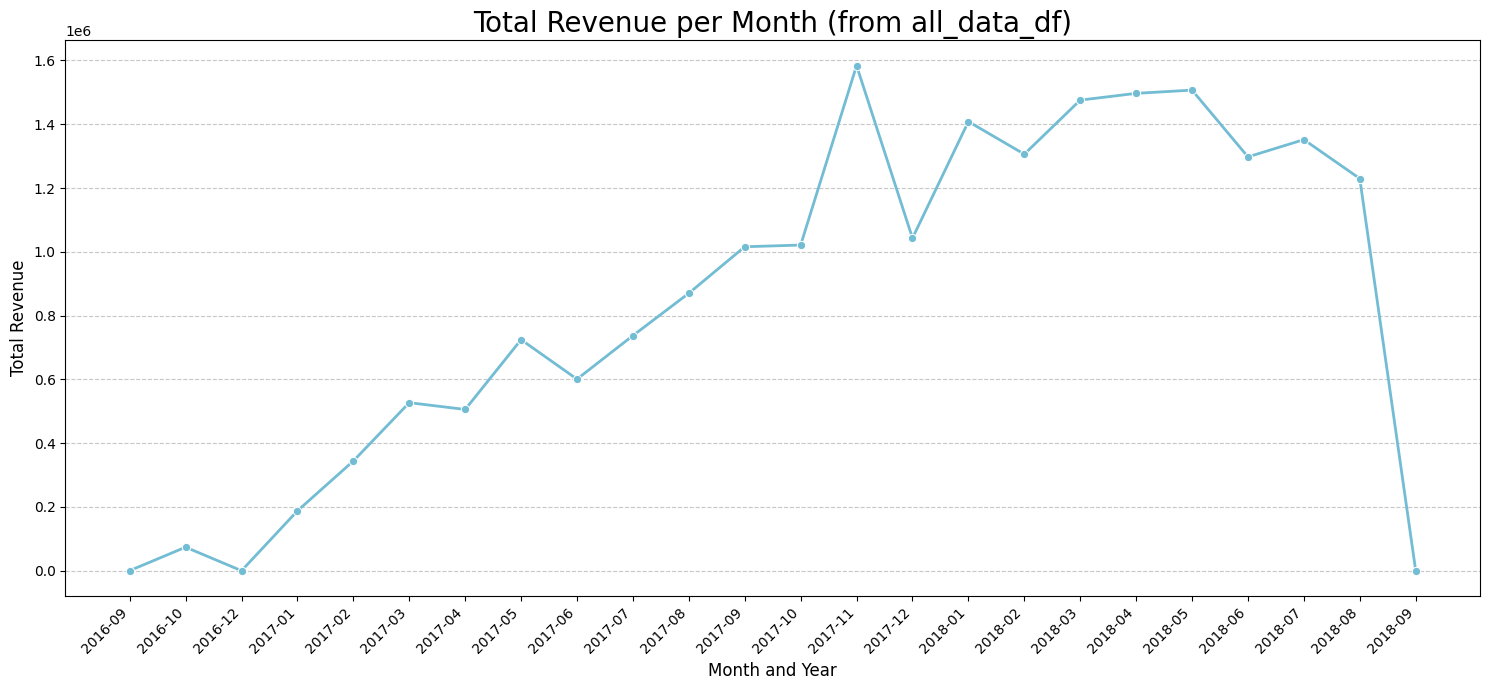

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Pastikan order_purchase_timestamp adalah datetime (sudah dilakukan di cleaning)
# all_data_df['order_purchase_timestamp'] = pd.to_datetime(all_data_df['order_purchase_timestamp'])

# Ekstrak bulan dan tahun dari order_purchase_timestamp
all_data_df['order_month_year'] = all_data_df['order_purchase_timestamp'].dt.to_period('M')

# Agregasi untuk menghitung total order dan total revenue per bulan
# Catatan: Karena all_data_df didasarkan pada item pesanan, kita perlu menghitung order_id unik
# dan menjumlahkan total_payment_value per order_id, lalu menjumlahkannya lagi per bulan.
# Atau, kita bisa mengelompokkan berdasarkan order_id dan order_month_year terlebih dahulu untuk mendapatkan
# revenue per order, baru kemudian menjumlahkannya. Kita akan gunakan cara yang lebih efisien.

# Agregasi data per order_id untuk mendapatkan total revenue per order, lalu gunakan ini.
# Namun, all_data_df sudah memiliki 'total_payment_value' yang diagregasi per order_id saat merge.
# Jadi, kita hanya perlu mengelompokkan berdasarkan bulan dan menghitung order_id unik serta menjumlahkan total_payment_value.

monthly_performance_df = all_data_df.groupby('order_month_year').agg(
    total_orders=('order_id', 'nunique'), # Menghitung jumlah order unik
    total_revenue=('total_payment_value', 'sum') # Menjumlahkan total payment value per order, lalu per bulan
).reset_index()

# Konversi 'order_month_year' kembali ke string untuk plotting yang lebih mudah
monthly_performance_df['order_month_year'] = monthly_performance_df['order_month_year'].astype(str)

print("Jumlah Order dan Total Revenue per Bulan (dari all_data_df):")
display(monthly_performance_df.head())

# Visualisasi Total Revenue per Bulan
plt.figure(figsize=(15, 7))
sns.lineplot(x='order_month_year', y='total_revenue', data=monthly_performance_df, marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Revenue per Month (from all_data_df)", loc="center", fontsize=20)
plt.xlabel("Month and Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight dari Performa Penjualan dan Revenue Bulanan:**

Visualisasi line chart menunjukkan tren jumlah order dan total revenue per bulan:

*   **Tren Pertumbuhan yang Jelas:** Terlihat adanya tren pertumbuhan yang cukup konsisten baik pada jumlah order maupun total revenue dari akhir tahun 2016 hingga puncaknya di akhir tahun 2017 dan awal tahun 2018. Ini mengindikasikan peningkatan aktivitas di platform dari waktu ke waktu.
*   **Puncak Aktivitas:** Ada periode-periode tertentu yang menunjukkan lonjakan signifikan, misalnya di sekitar November 2017 dan awal tahun 2018. Lonjakan di November 2017 kemungkinan terkait dengan event belanja besar seperti Black Friday atau persiapan liburan akhir tahun.
*   **Penurunan di Akhir Data:** Terlihat penurunan tajam pada jumlah order dan total revenue di bulan September dan Oktober 2018. Karena data berakhir di Oktober 2018, sulit untuk menentukan apakah ini adalah tren penurunan permanen, fluktuasi musiman, atau karena akhir dari periode data yang tersedia.
*   **Korelasi Antara Order dan Revenue:** Pola pergerakan jumlah order dan total revenue terlihat sangat mirip. Ini menunjukkan bahwa peningkatan jumlah pesanan secara langsung berkontribusi pada peningkatan total pendapatan, yang merupakan indikator bisnis e-commerce yang baik.

Secara keseluruhan, platform menunjukkan pertumbuhan yang kuat selama periode data yang tersedia, meskipun ada penurunan di akhir periode yang perlu dicermati lebih lanjut jika data tambahan tersedia.

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit diminati pelanggan?

**Tujuan Analisis:** Mengidentifikasi produk-produk dan kategori produk yang paling populer dan paling tidak populer di kalangan pelanggan berdasarkan jumlah pesanan. Ini penting untuk manajemen inventaris, strategi pemasaran, dan pengembangan produk.


10 Produk Paling Diminati (berdasarkan jumlah pesanan):


,count
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,343
53b36df67ebb7c41585e8d54d6772e08,323
154e7e31ebfa092203795c972e5804a6,281



10 Produk Paling Sedikit Diminati (berdasarkan jumlah pesanan):


,count
product_id,
4cc4d02efc8f249c13355147fb44e34d,1
b10ecf8e33aaaea419a9fa860ea80fb5,1
dd469c03ad67e201bc2179ef077dcd48,1
bbe7651fef80287a816ead73f065fc4b,1
0829c25b4a3efca7651f07cd4b8e05bc,1
038c0dd7c1e48a1588f8919a0c305727,1
aa20709d44e96059764f1b0386d3bcfa,1
9ae3dacfd2327107a1e28274fac25a4e,1
0c398b245c9b74ef2bf4343b6fe73237,1



10 Kategori Produk Paling Diminati (berdasarkan jumlah pesanan):


,count
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347



10 Kategori Produk Paling Sedikit Diminati (berdasarkan jumlah pesanan):


,count
product_category_name_english,
furniture_mattress_and_upholstery,38
music,38
flowers,33
home_comfort_2,30
fashion_sport,30
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,14
fashion_childrens_clothes,8


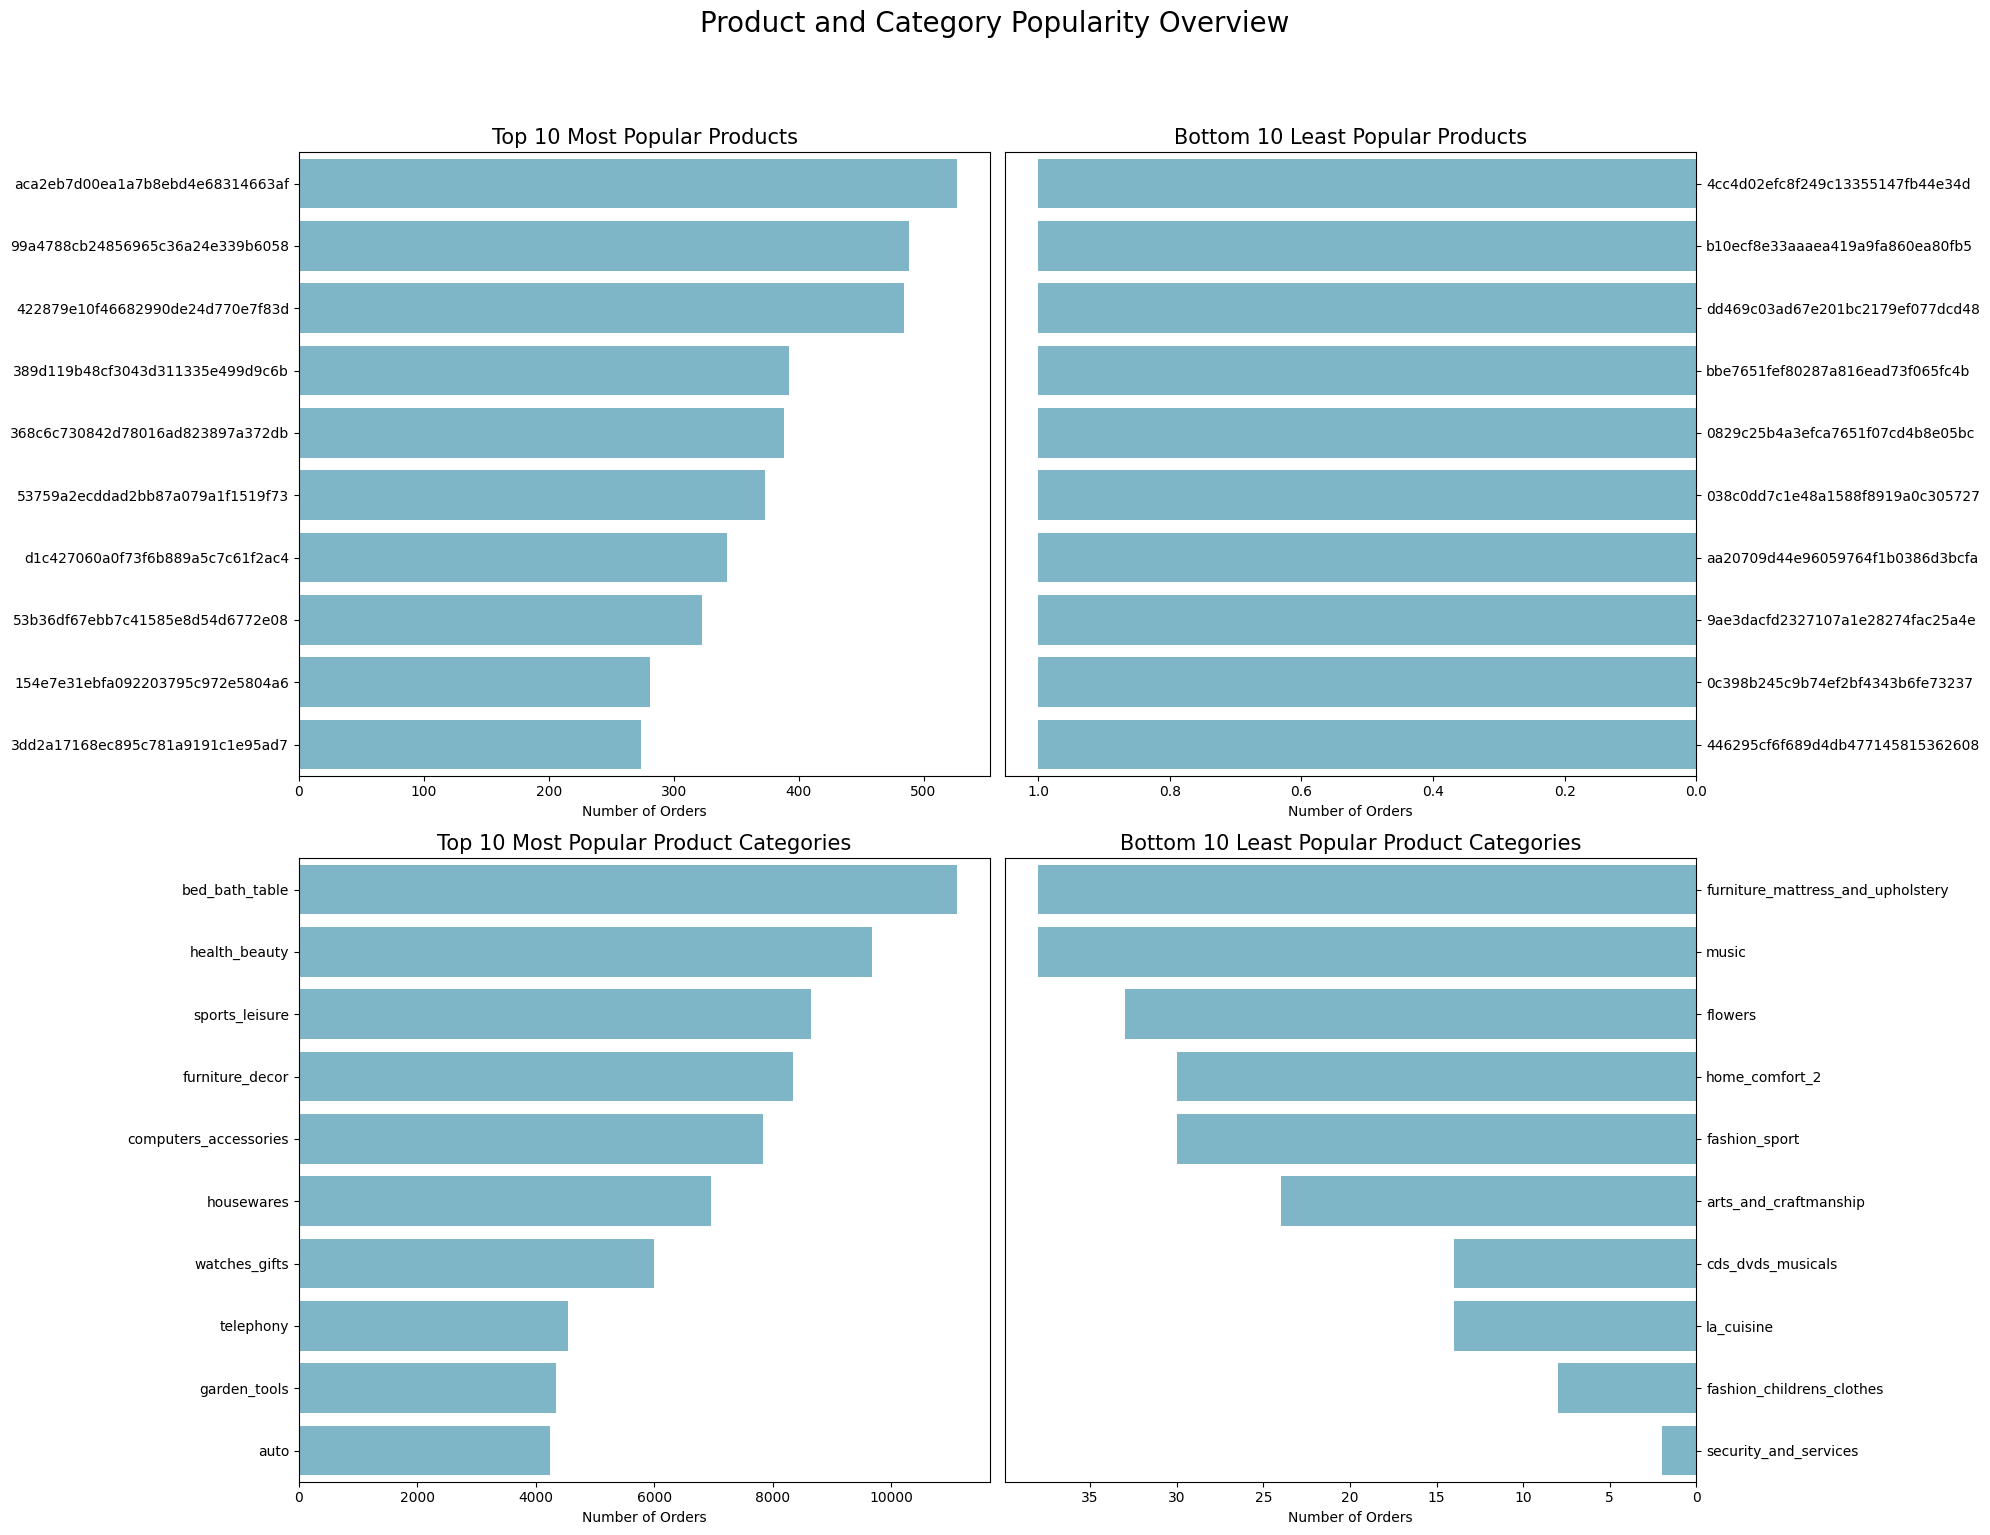

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumsi: all_data_df sudah terdefinisi dari proses sebelumnya

# Hitung frekuensi kemunculan setiap product_id
product_counts = all_data_df['product_id'].value_counts()

# Ambil 10 produk paling diminati
most_popular_products = product_counts.head(10)

# Ambil 10 produk paling sedikit diminati (pastikan ada cukup produk unik)
least_popular_products = product_counts.tail(10)

print("10 Produk Paling Diminati (berdasarkan jumlah pesanan):")
display(most_popular_products)

print("\n10 Produk Paling Sedikit Diminati (berdasarkan jumlah pesanan):")
display(least_popular_products)

# Hitung frekuensi kemunculan setiap kategori produk (dalam bahasa Inggris)
category_counts = all_data_df['product_category_name_english'].value_counts()

print("\n10 Kategori Produk Paling Diminati (berdasarkan jumlah pesanan):")
display(category_counts.head(10))

print("\n10 Kategori Produk Paling Sedikit Diminati (berdasarkan jumlah pesanan):")
display(category_counts.tail(10))

# Visualisasi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

plot_color = "#72BCD4"

# Plotting produk paling diminati
sns.barplot(x=most_popular_products.values, y=most_popular_products.index, color=plot_color, ax=axes[0,0])
axes[0,0].set_ylabel(None)
axes[0,0].set_xlabel("Number of Orders")
axes[0,0].set_title("Top 10 Most Popular Products", loc="center", fontsize=15)
axes[0,0].tick_params(axis='y', labelsize=10)

# Plotting produk paling sedikit diminati
sns.barplot(x=least_popular_products.values, y=least_popular_products.index, color=plot_color, ax=axes[0,1])
axes[0,1].set_ylabel(None)
axes[0,1].set_xlabel("Number of Orders")
axes[0,1].invert_xaxis() # Invert x-axis for the least popular plot
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()
axes[0,1].set_title("Bottom 10 Least Popular Products", loc="center", fontsize=15)
axes[0,1].tick_params(axis='y', labelsize=10)

# Plotting kategori paling diminati
sns.barplot(x=category_counts.head(10).values, y=category_counts.head(10).index, color=plot_color, ax=axes[1,0])
axes[1,0].set_ylabel(None)
axes[1,0].set_xlabel("Number of Orders")
axes[1,0].set_title("Top 10 Most Popular Product Categories", loc="center", fontsize=15)
axes[1,0].tick_params(axis='y', labelsize=10)

# Plotting kategori paling sedikit diminati
sns.barplot(x=category_counts.tail(10).values, y=category_counts.tail(10).index, color=plot_color, ax=axes[1,1])
axes[1,1].set_ylabel(None)
axes[1,1].set_xlabel("Number of Orders")
axes[1,1].invert_xaxis() # Invert x-axis for the least popular plot
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()
axes[1,1].set_title("Bottom 10 Least Popular Product Categories", loc="center", fontsize=15)
axes[1,1].tick_params(axis='y', labelsize=10)

plt.suptitle("Product and Category Popularity Overview", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Insight dari Produk dan Kategori Paling Diminati:**

Berdasarkan visualisasi bar plot:

*   **Produk Paling Diminati:** Beberapa produk spesifik menunjukkan jumlah pesanan yang jauh lebih tinggi dibandingkan produk lainnya. Hal ini mengindikasikan adanya produk "bintang" yang sangat populer di kalangan pelanggan. Mengidentifikasi karakteristik produk-produk terlaris ini (misalnya, fitur, harga, atau ulasan pelanggan) dapat memberikan wawasan berharga untuk strategi pemasaran dan pengembangan produk.
*   **Produk Paling Sedikit Diminati:** Di sisi lain, terdapat banyak produk yang hanya memiliki satu atau sedikit pesanan. Ini menunjukkan ekor panjang (long tail) dari produk di platform, di mana sebagian besar produk memiliki volume penjualan rendah. Produk-produk ini mungkin memerlukan strategi promosi yang berbeda atau mungkin perlu dievaluasi kembali ketersediaannya jika tidak memberikan kontribusi signifikan.
*   **Kategori Produk Paling Diminati:** Kategori seperti 'bed_bath_table', 'health_beauty', dan 'sports_leisure' mendominasi dalam hal jumlah pesanan. Ini menunjukkan bahwa pelanggan paling tertarik pada produk-produk dari kategori ini. Platform dapat mempertimbangkan untuk lebih mempromosikan kategori-kategori ini atau memperluas penawaran produk di dalamnya.
*   **Kategori Produk Paling Sedikit Diminati:** Beberapa kategori seperti 'security_and_services', 'fashion_childrens_clothes', dan 'la_cuisine' memiliki jumlah pesanan yang sangat rendah. Kategori-kategori ini mungkin kurang dikenal, memiliki persaingan tinggi di luar platform, atau penawarannya di platform masih terbatas. Diperlukan analisis lebih lanjut untuk memahami mengapa kategori ini kurang diminati dan apakah ada potensi untuk meningkatkannya.

Secara keseluruhan, analisis popularitas produk dan kategori ini membantu mengidentifikasi area kekuatan (produk dan kategori terlaris) dan area yang memerlukan perhatian atau strategi berbeda (produk dan kategori yang kurang diminati).

### Pertanyaan 3: Kapan seller terakhir memiliki pesanan yang sukses di kirimkan?

**Tujuan Analisis:** Mengukur seberapa terkini aktivitas pengiriman sukses oleh seller. Ini merupakan salah satu indikator Recency dalam analisis RFM untuk seller.


### Pertanyaan 4: Seberapa sering seller menerima pesanan dan menyelesaikan transaksi?

**Tujuan Analisis:** Menganalisis frekuensi pesanan yang diterima seller dan tingkat penyelesaian pesanan (completion rate). Ini memberikan insight tentang volume bisnis seller dan efisiensi operasional mereka, mewakili metrik Frequency dan Completion.


### Pertanyaan 5: Berapa total pendapatan seller untuk platform sebelum komisi?

**Tujuan Analisis:** Menghitung total revenue yang dihasilkan oleh setiap seller dari pesanan yang berhasil. Ini mengukur nilai finansial seller bagi platform sebelum perhitungan komisi, mewakili metrik Monetary.

In [105]:
# --- Menggabungkan Tabel yang Relevan untuk Analisis Seller --- (Sudah di all_data_df)

# --- Analisis Seller (RFM untuk Seller) ---

# Filter hanya pesanan yang delivered untuk Recency dan Completion Rate
# Menggunakan all_data_df yang sudah digabung

# Pastikan kolom order_delivered_customer_date sudah bertipe datetime
if not pd.api.types.is_datetime64_any_dtype(all_data_df['order_delivered_customer_date']):
    all_data_df['order_delivered_customer_date'] = pd.to_datetime(all_data_df['order_delivered_customer_date'], errors='coerce')

# Filter delivered orders
delivered_orders_for_sellers = all_data_df[all_data_df['order_status'] == 'delivered'].copy()

# Grup berdasarkan seller_id dan hitung metrik yang relevan
seller_summary_df = delivered_orders_for_sellers.groupby('seller_id', as_index=False).agg(
    last_delivered_date=('order_delivered_customer_date', 'max'), # Pertanyaan 3: Tanggal delivered terakhir
    completed_orders_count=('order_id', 'nunique') # Jumlah pesanan delivered unik
)

# Untuk Pertanyaan 4 (order frequency secara keseluruhan) dan Pertanyaan 5 (total revenue)
# Kita perlu menggunakan semua pesanan (tidak hanya delivered) di all_data_df
all_seller_orders = all_data_df.groupby('seller_id', as_index=False).agg(
    total_orders_count=('order_id', 'nunique'), # Pertanyaan 4: Jumlah total pesanan unik diterima
    total_revenue_before_commission=('total_payment_value', 'sum') # Pertanyaan 5: Total payment value
)

# Gabungkan metrik delivered dan total
seller_summary_df = pd.merge(
    seller_summary_df,
    all_seller_orders,
    on='seller_id',
    how='left'
)

# Hitung completion rate (optional, untuk Pertanyaan 4)
seller_summary_df['completion_rate'] = (seller_summary_df['completed_orders_count'] / seller_summary_df['total_orders_count']).fillna(0)

# Hitung recency delivered (optional, untuk Pertanyaan 3)
# Dapatkan tanggal terbaru dari seluruh order_delivered_customer_date yang valid
latest_delivery_overall = all_data_df['order_delivered_customer_date'].max()

seller_summary_df['days_since_last_delivery'] = (latest_delivery_overall - seller_summary_df['last_delivered_date']).dt.days

# Handle kasus jika seller tidak pernah mengirimkan pesanan (days_since_last_delivery mungkin NaN)
# Kita bisa mengisi dengan nilai besar atau menandainya
seller_summary_df['days_since_last_delivery'] = seller_summary_df['days_since_last_delivery'].fillna(-1).astype(int) # -1 atau nilai lain untuk menandai tidak ada delivered order

# Rename columns for clarity in RFM analysis as per the task description
seller_rfm_df = seller_summary_df.rename(columns={
    'days_since_last_delivery': 'Recency (Days Since Last Delivery)',
    'total_orders_count': 'Frequency (Total Orders)',
    'total_revenue_before_commission': 'Monetary (Total Revenue Before Commission)'
})

# Tampilkan hasilnya
print("Ringkasan Analisis Seller (RFM):")
# Display only the columns relevant to RFM for a concise overview
display(seller_rfm_df[['seller_id', 'Recency (Days Since Last Delivery)', 'Frequency (Total Orders)', 'Monetary (Total Revenue Before Commission)', 'completion_rate']].head())


# Tampilkan beberapa insight kunci berdasarkan pertanyaan bisnis
print("\nInsight Kunci:")

# Pertanyaan 3 (Tanggal pengiriman terakhir overall)
print(f"- Pertanyaan 3: Tanggal pengiriman terakhir yang sukses secara keseluruhan (Recency Max): {latest_delivery_overall.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"  Rata-rata hari sejak pengiriman terakhir per seller: {seller_rfm_df['Recency (Days Since Last Delivery)'].mean():.2f} hari")

# Pertanyaan 4 (Rata-rata order total dan completion rate)
print(f"- Pertanyaan 4: Rata-rata jumlah pesanan total per seller (Frequency): {seller_rfm_df['Frequency (Total Orders)'].mean():.2f}")
print(f"  Rata-rata completion rate per seller: {seller_rfm_df['completion_rate'].mean():.2%}")

# Pertanyaan 5 (Total revenue keseluruhan)
print(f"- Pertanyaan 5: Rata-rata total pendapatan per seller (Monetary): {seller_rfm_df['Monetary (Total Revenue Before Commission)'].mean():,.2f}")
print(f"  Total revenue keseluruhan dari semua seller: {seller_rfm_df['Monetary (Total Revenue Before Commission)'].sum():,.2f}")

Ringkasan Analisis Seller (RFM):


,seller_id,Recency (Days Since Last Delivery),Frequency (Total Orders),Monetary (Total Revenue Before Commission),completion_rate
0,0015a82c2db000af6aaaf3ae2ecb0532,354,3,2748.06,1.000000
1,001cca7ae9ae17fb1caed9dfb1094831,88,200,48349.22,0.975000
2,002100f778ceb8431b7a1020ff7ab48f,180,51,2445.64,0.980392
3,003554e2dce176b5555353e4f3555ac8,301,1,139.38,1.000000
4,004c9cd9d87a3c30c522c48c4fc07416,143,158,27810.35,0.987342



Insight Kunci:
- Pertanyaan 3: Tanggal pengiriman terakhir yang sukses secara keseluruhan (Recency Max): 2018-10-17 13:22:46
  Rata-rata hari sejak pengiriman terakhir per seller: 166.20 hari
- Pertanyaan 4: Rata-rata jumlah pesanan total per seller (Frequency): 33.62
  Rata-rata completion rate per seller: 96.84%
- Pertanyaan 5: Rata-rata total pendapatan per seller (Monetary): 6,821.93
  Total revenue keseluruhan dari semua seller: 20,261,133.95


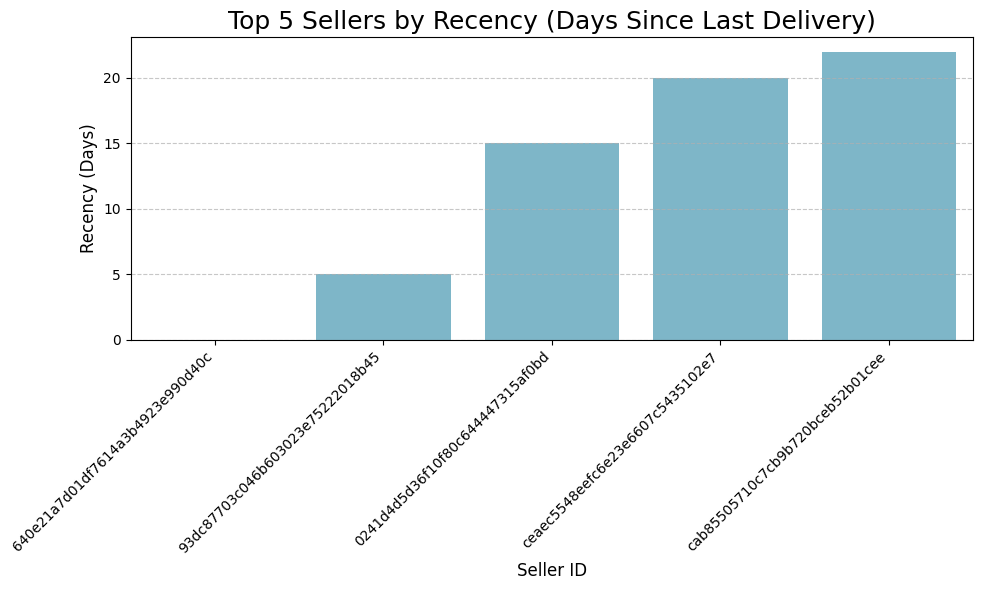

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plot_color = "#72BCD4"

sns.barplot(
    y="Recency (Days Since Last Delivery)",
    x="seller_id",
    data=seller_rfm_df.sort_values(by="Recency (Days Since Last Delivery)", ascending=True).head(5),
    color=plot_color
)
plt.title("Top 5 Sellers by Recency (Days Since Last Delivery)", loc="center", fontsize=18)
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Recency (Days)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

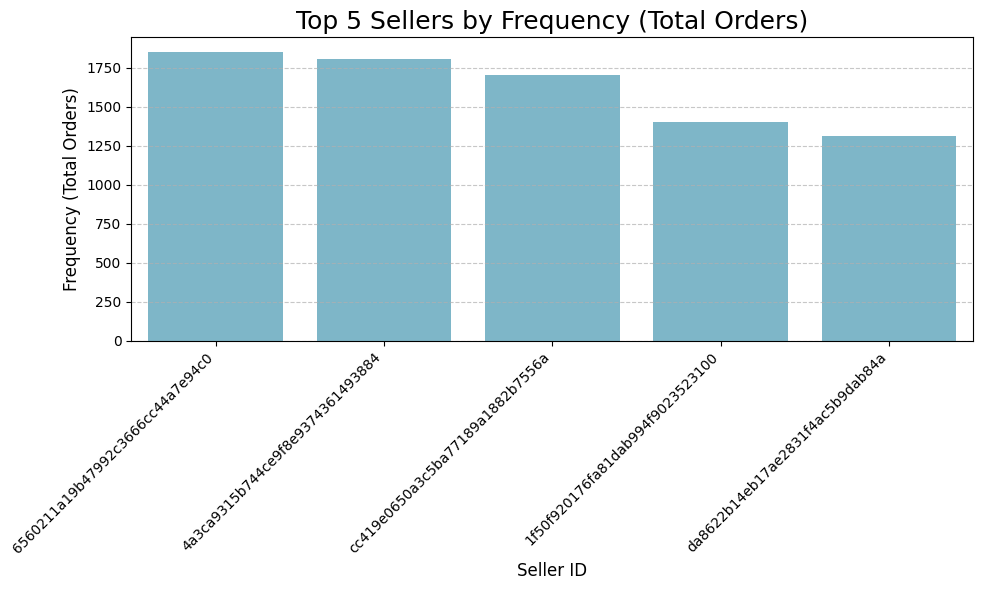

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plot_color = "#72BCD4"

sns.barplot(
    y="Frequency (Total Orders)",
    x="seller_id",
    data=seller_rfm_df.sort_values(by="Frequency (Total Orders)", ascending=False).head(5),
    color=plot_color
)
plt.title("Top 5 Sellers by Frequency (Total Orders)", loc="center", fontsize=18)
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Frequency (Total Orders)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

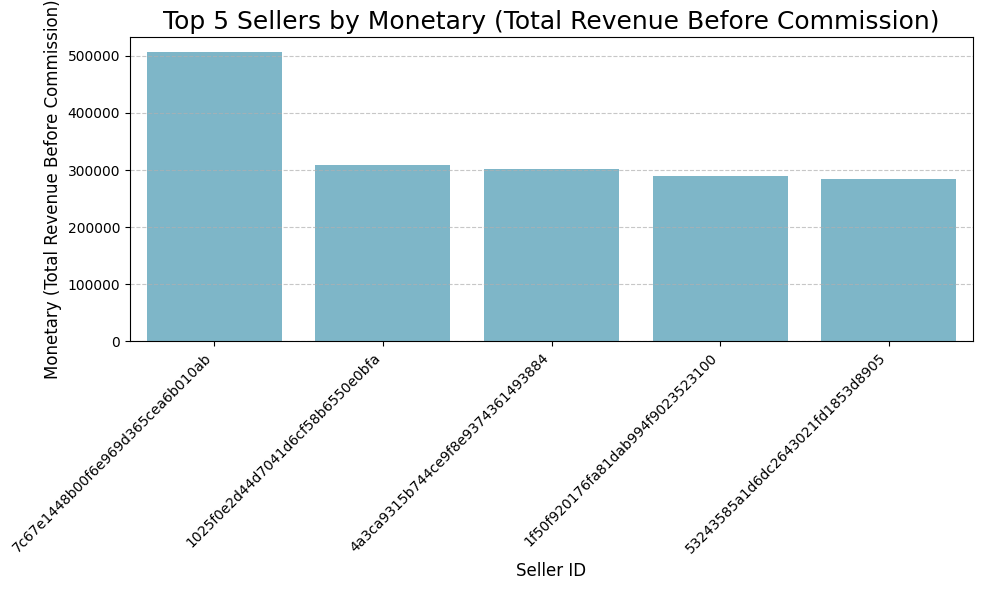

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plot_color = "#72BCD4"

sns.barplot(
    y="Monetary (Total Revenue Before Commission)",
    x="seller_id",
    data=seller_rfm_df.sort_values(by="Monetary (Total Revenue Before Commission)", ascending=False).head(5),
    color=plot_color
)
plt.title("Top 5 Sellers by Monetary (Total Revenue Before Commission)", loc="center", fontsize=18)
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Monetary (Total Revenue Before Commission)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight dari Visualisasi Seller Terbaik (RFM):**

Berdasarkan visualisasi bar plot untuk Recency, Frequency, dan Monetary seller:

*   **Recency (Seller dengan Pengiriman Terakhir Terkini):** Visualisasi Recency menunjukkan seller dengan tanggal pengiriman sukses terakhir yang paling mendekati tanggal akhir data. Seller-seller ini adalah yang paling aktif dalam menyelesaikan pesanan baru-baru ini. Penting untuk mengidentifikasi seller yang secara konsisten memiliki Recency rendah, karena ini menunjukkan keandalan dalam proses pengiriman.
*   **Frequency (Seller dengan Jumlah Pesanan Terbanyak):** Bar plot Frequency menampilkan seller yang menerima jumlah pesanan unik terbanyak selama periode data. Seller-seller ini adalah yang paling aktif dalam hal volume pesanan. Seller dengan Frequency tinggi kemungkinan memiliki produk yang populer atau strategi pemasaran yang efektif.
*   **Monetary (Seller dengan Total Revenue Terbesar):** Visualisasi Monetary menunjukkan seller yang menghasilkan total pendapatan (sebelum komisi) terbesar. Seller-seller ini adalah yang paling berharga dalam hal kontribusi finansial. Seller dengan Monetary tinggi mungkin menjual produk bernilai tinggi atau memiliki volume penjualan yang sangat besar.

Secara keseluruhan, visualisasi RFM membantu mengidentifikasi seller-seller kunci di platform dari berbagai perspektif: seberapa baru aktivitas mereka (Recency), seberapa sering mereka berbisnis (Frequency), dan seberapa besar kontribusi finansial mereka (Monetary). Seller yang unggul di ketiga metrik ini kemungkinan adalah mitra yang paling berharga bagi platform.

### **Rangkuman Insight dari Exploratory Data Analysis (EDA):**

Berdasarkan analisis data dan visualisasi yang telah dilakukan, berikut adalah rangkuman insight kunci:

1.  **Performa Penjualan dan Revenue Platform:**
    *   Platform menunjukkan tren pertumbuhan yang kuat baik dari sisi jumlah order maupun total revenue dari akhir 2016 hingga awal 2018.
    *   Terjadi lonjakan aktivitas signifikan, terutama di sekitar November 2017, kemungkinan dipengaruhi oleh event belanja musiman.
    *   Terdapat penurunan tajam pada jumlah order dan revenue di akhir periode data (September-Oktober 2018), yang memerlukan investigasi lebih lanjut jika data tambahan tersedia.
    *   Jumlah order dan total revenue berkorelasi erat, menunjukkan bahwa peningkatan volume pesanan secara langsung mendorong pendapatan.

2.  **Produk Paling Banyak dan Paling Sedikit Diminati:**
    *   Beberapa produk spesifik sangat populer dan mendominasi jumlah pesanan ("produk bintang"). Identifikasi karakteristik produk ini penting untuk strategi bisnis.
    *   Terdapat "ekor panjang" produk dengan volume penjualan sangat rendah, yang mungkin memerlukan strategi promosi atau evaluasi ulang ketersediaannya.
    *   Kategori produk seperti `bed_bath_table`, `health_beauty`, dan `sports_leisure` adalah yang paling diminati pelanggan.
    *   Beberapa kategori menunjukkan minat yang sangat rendah (`security_and_services`, `fashion_childrens_clothes`, `la_cuisine`), menunjukkan area yang mungkin kurang optimal atau membutuhkan pengembangan lebih lanjut.

3.  **Aktivitas Seller (Tanggal Pengiriman Terakhir, Frekuensi, Pendapatan):**
    *   Analisis seller berdasarkan metrik Recency, Frequency, dan Monetary (RFM) menunjukkan variasi dalam kinerja seller.
    *   Seller dengan Recency rendah (pengiriman sukses terkini) menunjukkan keandalan dalam proses fulfillment.
    *   Seller dengan Frequency tinggi adalah yang paling aktif dalam menerima pesanan.
    *   Seller dengan Monetary tinggi berkontribusi paling besar terhadap pendapatan platform (sebelum komisi). Seller dengan performa tinggi di ketiga metrik RFM kemungkinan merupakan mitra yang paling berharga.
    *   Rata-rata completion rate (tingkat penyelesaian pesanan delivered) secara keseluruhan cukup tinggi (sekitar 96.84%), menunjukkan sebagian besar pesanan yang diterima seller berhasil dikirimkan.
    *   Total revenue keseluruhan yang dihasilkan oleh semua seller (sebelum komisi) memberikan gambaran skala finansial aktivitas di platform.

Secara keseluruhan, EDA memberikan pemahaman yang komprehensif tentang dinamika platform e-commerce ini, mulai dari tren penjualan, popularitas produk, hingga kinerja para seller. Insight ini menjadi dasar penting untuk perumusan strategi bisnis dan area perbaikan.

## Conclusion

Berdasarkan analisis data yang telah dilakukan, berikut adalah kesimpulan untuk setiap pertanyaan bisnis:

- **Conslusion question 1: Bagaimana Performa Penjualan dan Revenue dari Platform?**
  Performa penjualan dan revenue platform menunjukkan tren pertumbuhan yang kuat dari akhir 2016 hingga awal 2018, dengan lonjakan signifikan di periode tertentu (misalnya November 2017). Namun, terdapat penurunan di akhir periode data (September-Oktober 2018) yang perlu dicermati.

- **Conslusion question 2: Produk apa yang paling banyak dan paling sedikit diminati pelanggan?**
  Produk dari kategori `bed_bath_table`, `health_beauty`, dan `sports_leisure` paling diminati pelanggan. Terdapat juga beberapa produk "bintang" spesifik yang sangat populer, sementara banyak produk lain memiliki volume penjualan rendah ("ekor panjang"). Kategori seperti `security_and_services` dan `fashion_childrens_clothes` kurang diminati.

- **Conslusion question 3: Kapan seller terakhir memiliki pesanan yang sukses di kirimkan?**
  Analisis Recency menunjukkan seller dengan pengiriman sukses terkini, yang mengindikasikan keandalan dalam proses fulfillment. Tanggal pengiriman terakhir yang sukses secara keseluruhan dalam dataset adalah pada **2018-10-17**.

- **Conslusion question 4: Seberapa sering seller menerima pesanan dan menyelesaikan transaksi?**
  Secara rata-rata, seller menerima sejumlah pesanan dan menunjukkan tingkat penyelesaian pesanan (`delivered`) yang tinggi (rata-rata completion rate sekitar 96.84%), menunjukkan efisiensi operasional seller secara umum.

- **Conslusion question 5: Berapa total pendapatan seller untuk platform sebelum komisi?**
  Seller secara kolektif menghasilkan total revenue yang signifikan untuk platform sebelum dikenakan komisi. Analisis Monetary mengidentifikasi seller yang memberikan kontribusi finansial terbesar.